# Analise de dados do Airbnb - Porto (Portugal)
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atividade**. Ah, o detalhe é que ela **não possui nenhum hotel!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada a 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Umas das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

<center><img alt='Analisando Airbnb' width='10%' src='https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg'></center>

**Nesse notebook, iremos analisar os dados referente a cidade de Porto em Portugal, e ver quais insights pode ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa analise exploratória inicial, será baixado apenas o seguinte arquivo:

* listings.csv - Summary information and metrics for listings in Porto (good for visualisations).

Importante: O portal está em constante evolução, e em determinado momento pode ser que o conjunto de dados utilizado nesse notebook não esteja mais disponivel, o que quebraria nosso código.

Vamos ao projeto:

In [3]:
# importando pacotes necessário
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importando arquivo .csv
DATA_PATH = 'listings2.csv'
df = pd.read_csv(DATA_PATH)

# Dimenssão do DataSet
print('Dimenssão do Dataset: \n',
     'Variáveis: ',df.shape[1],'\n',
     'Entradas: ',df.shape[0])

Dimenssão do Dataset: 
 Variáveis:  16 
 Entradas:  10917


## Analise dos Dados
**Dicionário de variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número do id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Distritos dentro da cidade do Porto.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido.
* `price` - Preço para alugar o imóvel.
* `minimum_nights` - Quantidade minima de noites para alugar.
* `number_of_reviews` - Número de avaliações que a propriedade possui.
* `last_review` - Data da ultima avaliação.
* `reviews_per_month` - Quantidade de avaliação por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro dos 365 dias.

Vamos analisar a primeiras e ultimas linhas do Dataset:

In [4]:
# Ler as 5 primerias linhas do Dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,95,5,17,2018-08-19,0.19,1,0
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,73,90,39,2015-07-22,0.38,3,0
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-05-07,0.19,3,0
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.11,3,0
4,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,136,2019-04-26,1.16,6,160


In [5]:
# ver as ultimas linha do dataset
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10912,50921796,Nomad's Porto Easy Stay 1,164595585,Nomad City Flats,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.155280,-8.618770,Entire home/apt,77,1,0,NaN,NaN,33,358
10913,50928818,NorteSoul Mouzinho - Ap03,25997344,Hildebrando,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.144531,-8.612586,Entire home/apt,72,2,0,NaN,NaN,18,190
10914,50930469,GuestReady - Eye on Porto Reborn,410606351,Joao,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.162140,-8.621850,Entire home/apt,30,2,0,NaN,NaN,1,347
10915,50934484,*NEW* DA'HOME - WONDERFUL CONCEIÇÃO APARTMENT,278829307,DAHome,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.148820,-8.615390,Entire home/apt,125,3,0,NaN,NaN,3,343
10916,50937273,Amazing House land view,407986023,Maria,VILA NOVA DE GAIA,Avintes,41.105160,-8.553780,Private room,599,7,0,NaN,NaN,3,358


## Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?, Qual tipos das variáveis?.

Vamos identificar a quantidade de linhas e colunas que nosso conjunto de dados possui, e ver o tipo de cada coluna.

Esse dataset que baixamos contem informações resumidas e métricas para hospedagem no Porto.

In [6]:
# identificar o volume de dados do Dataframe
print('Valume de dados do Dataframe: \n',
     'Quantidade de colunas:',df.shape[1], '\n',
     'Quantidade de linhas: ',df.shape[0])

# tipo de dados de cada coluna
print('--------------------------------')
print('Tipo de dados: \n')
print(df.dtypes)

Valume de dados do Dataframe: 
 Quantidade de colunas: 16 
 Quantidade de linhas:  10917
--------------------------------
Tipo de dados: 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Q2. Qual a porcentagem de valores ausentes no dataset?

A qualidade de um dataset está diretamente ralacionado a quantidade de valores ausentes. É importante entende logo no inicio se esses valores nulos são significativos comparando ao total de entradas.

* As colunas `last_review` e `reviews_per_month` possuem em torno de 19% de valores nulos, ambas com 2131 linhas

Para essa analise que estamos fazendo nesse projeto, não tem necessidade de mantermos essas variáveis, com isso para termos uma melhor visão dos dados, será excluido.

In [7]:
df.isnull().sum().sort_values(ascending=False)

last_review                       2131
reviews_per_month                 2131
name                                 1
host_name                            1
id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
# dropar colunas desnecessária
df.drop(columns=['last_review', 'reviews_per_month'], inplace=True)

In [9]:
# Excluir linhas faltantes
df.dropna(axis=0, inplace=True)

Ver informações de valores ausente, após a limpeza.

In [10]:
# ordenar de forma decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## Q3. Qual tipo de distribuição das variáveis?

Para identificar a distribuição, irei plotar o histograma das variáveis.

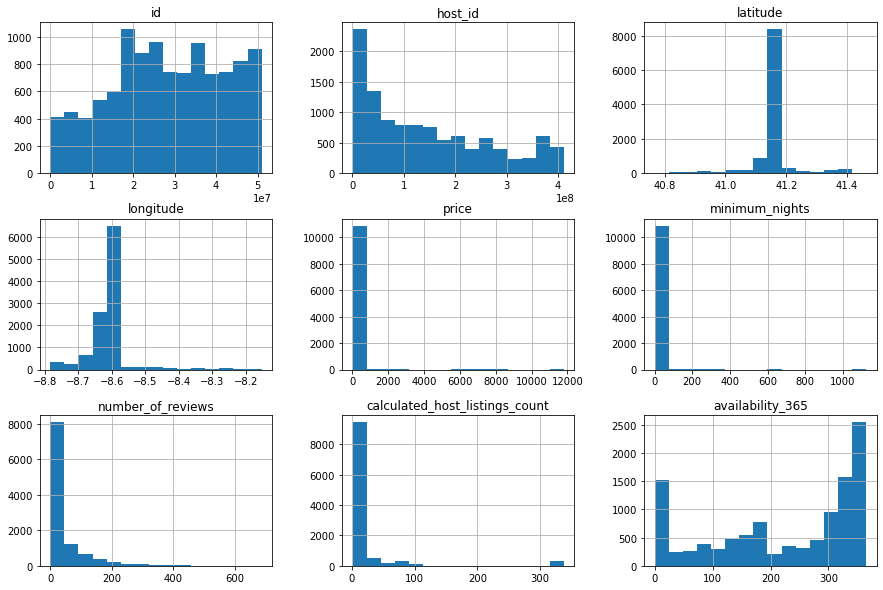

In [11]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))
plt.show()

## Q4. Identificar Outliers.

`Outliers são dados que se diferenciam drasticamente de todos os outros.`

Para distribuição do histograma é possível verificar indicios de presença de outliers. Olhe por exemplo as variáveis `price`e `minimum_nights`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, a duas maneiras rápidas que auxiliam a detecção de outliers:

* Resumo estátistico por meio do `describe()`
* Plotar boxplots para a variável

In [12]:
# ver um resumo estatistico das variáveis numéricas
df[['price', 'minimum_nights','calculated_host_listings_count', 'availability_365']].describe().round(3)

,price,minimum_nights,calculated_host_listings_count,availability_365
count,10915.000,10915.000,10915.000,10915.000
mean,93.134,3.413,20.363,223.084
std,329.727,19.105,59.687,128.310
min,8.000,1.000,1.000,0.000
25%,43.000,1.000,1.000,122.500
50%,64.000,2.000,4.000,271.000
75%,91.000,2.000,9.000,338.000
max,11799.000,1123.000,338.000,365.000


Olhando o resumo das estatisticas podemos ter alguma hipótese nas colunas price e minimum_nights

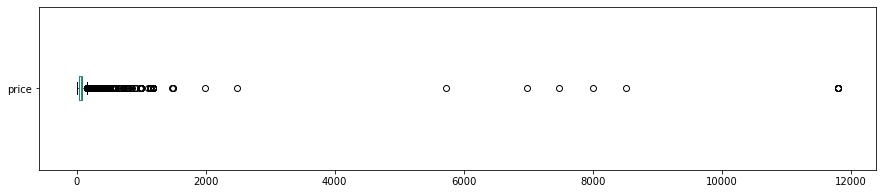

price valores a cima de 1500: 
 13 Entradas 
 0.1191%


In [13]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver a quantidade de valores a cima de 1500 
print('price valores a cima de 1500: \n',
     '{} Entradas'.format((len(df[df.price > 1500]))), '\n',
     '{:.4f}%'.format((len(df[df.price > 1500]) / df.shape[0]) * 100))

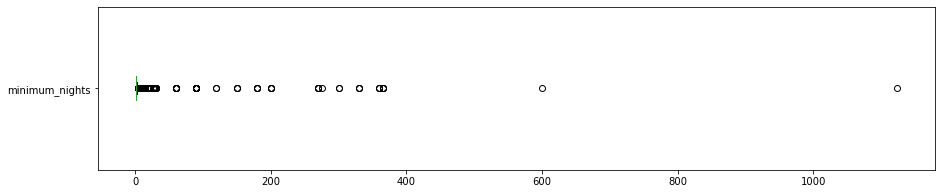

minimum_nights valores a cima de 30 dias: 
 56 Entradas 
 0.5131%


In [14]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores a cima de 30 dias
print('minimum_nights valores a cima de 30 dias: \n',
     '{} Entradas'.format((len(df[df.minimum_nights > 30]))), '\n',
     '{:.4f}%'.format(((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100)))

## Histograma sem outliers

Vamos limpar o Dataframe dos outliers que foram identificados nas variáveis `price` e `minimum_nights`.

Para tratar dos outliers desse conjunto de dados, vamos utilizar a refra do IQR Score, a variação interquartil (IQR) pode ser usada para identificar matematicamente os outliers de um conjunto de dados

Em geral, para encontrar o valor base para os outliers de baixo, você pega o valor do primeiro quartil (Q1) e diminui pelo valor do IQR multiplicado por 1,5.

Ou seja, outliers baixos estão abaixo de Q1 − (1,5*IQR), já para os outliers de cima, você deve somar o terceiro quartil (Q3) com o produto da mesma multiplicação anterior. Outliers de cima passam de Q3 + (1,5*IQR).

Para identificar o Q1 e Q3, pelo comando `describe()`, Q1 = 25% e Q3 = 75%

In [15]:
# estatisticas do dataset
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,10915.0,10915.0,10915.0,10915.0,10915.0,10915.0,10915.0,10915.0,10915.0
mean,28150527.1,141886809.1,41.2,-8.6,93.1,3.4,40.5,20.4,223.1
std,13659601.8,120891130.0,0.1,0.1,329.7,19.1,69.3,59.7,128.3
min,41339.0,154415.0,40.8,-8.8,8.0,1.0,0.0,1.0,0.0
25%,18362448.5,34089916.0,41.1,-8.6,43.0,1.0,1.0,1.0,122.5
50%,27730818.0,115102645.0,41.1,-8.6,64.0,2.0,10.0,4.0,271.0
75%,39570316.0,226955333.0,41.2,-8.6,91.0,2.0,48.0,9.0,338.0
max,50937273.0,411505127.0,41.5,-8.2,11799.0,1123.0,687.0,338.0,365.0


In [16]:
# identificar os outliers para a variavel price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR da variável price:', iqr_price)

# definindo limites
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print('Limite superior: ',sup_price)
print('Limite inferior: ',inf_price)


IQR da variável price: 48.0
Limite superior:  163.0
Limite inferior:  -29.0


In [17]:
# identificar os outliers para variavel minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variavel minimum_nights', iqr_minimum_nights )

# definir limites
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights

print('Limite superior: ',sup_minimum_nights)
print('Limite inferior: ',inf_minimum_nights)

IQR da variavel minimum_nights 1.0
Limite superior:  3.5
Limite inferior:  -0.5


In [18]:
# limpando o Dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 163.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 3.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights == -0.5].index, axis=0, inplace=True)

print("Shape antes da limpeza: ",df.shape)
print('Shape depois da limpeza: ',df_clean.shape)

Shape antes da limpeza:  (10915, 14)
Shape depois da limpeza:  (9311, 14)


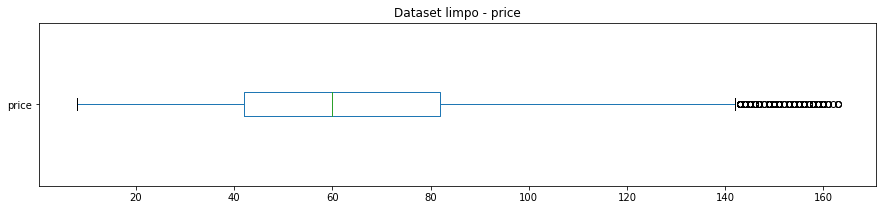

In [19]:
# Verificando conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False)
ax.set_title('Dataset limpo - price')
plt.show()

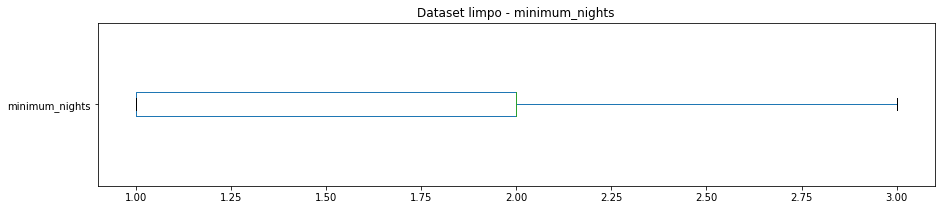

In [20]:
# verificando conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False)
ax.set_title('Dataset limpo - minimum_nights')
plt.show()

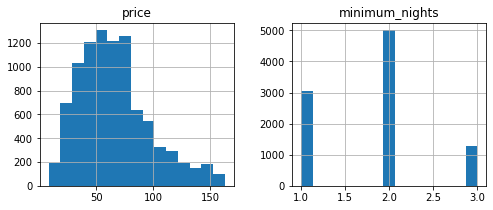

In [21]:
# plotar histograma para as variáveis que foram feito as limpeza
df_clean[['price', 'minimum_nights']].hist(bins=15, figsize=(8,3));
#df_clean.hist(bins=15, figsize=(15,10))

Na plotagem a cima, pode já verificar uma melhor distribuição dentro do histograma.

## Q5. Qual a média dos preços dos aluguel

Vamos identificar qual a média dos valores no geral, e separado por distritos e bairro na região do Porto.

In [22]:
# média da coluna price
print('Média dos preços dos aluguéis: ',df_clean.price.mean())

Média dos preços dos aluguéis:  65.67436365589089


In [23]:
print('Média dos preços por bairro, os 10 bairro mais caro:')
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

Média dos preços por bairro, os 10 bairro mais caro:


neighbourhood
Várzea                              150.000000
Laundos                             135.000000
Lomba                               132.000000
São Pedro de Castelões              125.000000
Sandim, Olival, Lever e Crestuma    124.166667
Carregosa                           120.000000
Alvarelhos e Guidões                116.666667
Milheirós de Poiares                115.000000
Santa Eulália                       111.000000
Vila de Cucujães                    110.000000
Name: price, dtype: float64

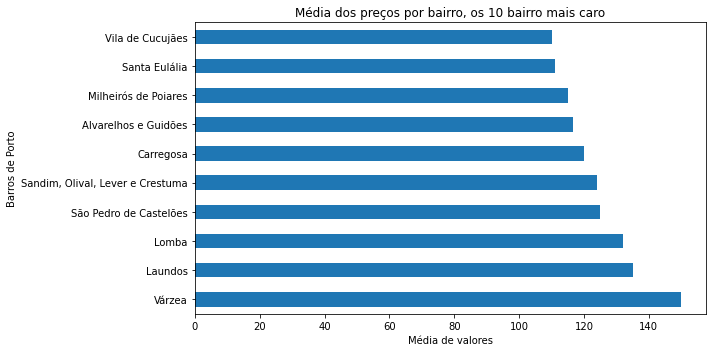

In [47]:
# plot histograma dos comparando a meia de valores por bairro
fig, ax = plt.subplots(figsize=(10,5))
df_proc_bairro = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(
    kind='barh')
ax.set_title('Média dos preços por bairro, os 10 bairro mais caro')
ax.set_xlabel('Média de valores')
ax.set_ylabel('Barros de Porto')
plt.tight_layout()

In [24]:
print('Média dos preços por distrito, os 10 distrito mais caro')
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

Média dos preços por distrito, os 10 distrito mais caro


neighbourhood_group
PAREDES            84.457143
SANTO TIRSO        84.000000
VALE DE CAMBRA     83.875000
AROUCA             83.178082
GONDOMAR           77.123288
ESPINHO            74.320388
TROFA              73.090909
VILA DO CONDE      72.252525
PÓVOA DE VARZIM    70.369427
PORTO              65.447298
Name: price, dtype: float64

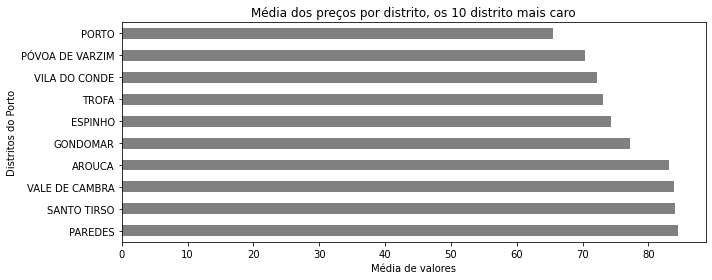

In [65]:
# plot histograma dos comparando a meia de valores por bairro
fig, ax = plt.subplots(figsize=(10,4))
df_preco_distrito = df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(
    ascending=False)[:10].plot(kind='barh', color='gray')
ax.set_title('Média dos preços por distrito, os 10 distrito mais caro')
ax.set_xlabel('Média de valores')
ax.set_ylabel('Distritos do Porto')
plt.tight_layout()

## Q6. Qual a correlação existente entre as variáveis

Correlaçao significa que existe uma relação entre duas coisa, no nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e a função do coeficiente de correlação estabelece qual a relação dela. Para identificar qual a correlação existentes entre as variáveis de interesse:

* Criar uma matriz de correlação.
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [25]:
# criar matriz de correlação
corr = df_clean[['price', 'minimum_nights',
                 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz
corr

,price,minimum_nights,calculated_host_listings_count,availability_365
price,1.000000,0.019977,-0.139842,0.117604
minimum_nights,0.019977,1.000000,-0.044157,-0.144045
calculated_host_listings_count,-0.139842,-0.044157,1.000000,0.117283
availability_365,0.117604,-0.144045,0.117283,1.000000


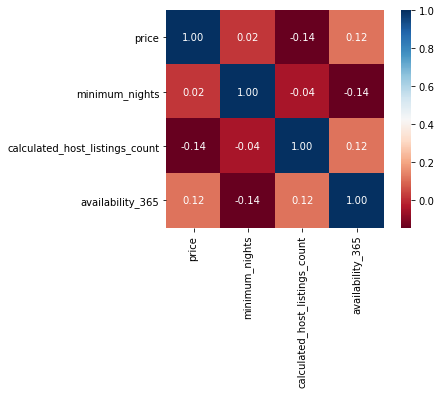

In [26]:
# criar gráfico heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f',square=True, linecolor='white', annot=True);

## Q7. Qual tipo de imóvel mais alugado no Airbnb.

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existe opções de apartamentos/casas inteiras, apenas aluguel de um quarto, ou mesmo dividir quarto com outras pessoas.

Vamos contar a quantidade de ocorrèncias de cada tipo de aluguel, usando o método `value_counts()`.

In [27]:
# mostrar a quantidade de cada tipo de imóvel
df_clean.room_type.value_counts()

Entire home/apt    7267
Private room       1792
Hotel room          148
Shared room         104
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponivel
(df_clean.room_type.value_counts() / df_clean.shape[0] * 100)

Entire home/apt    78.047471
Private room       19.246053
Hotel room          1.589518
Shared room         1.116958
Name: room_type, dtype: float64

## Q8. Plotar mata pela latitude e longitude

Como são fornecido a longitude e latitude, é possivel plotar cada ponto.

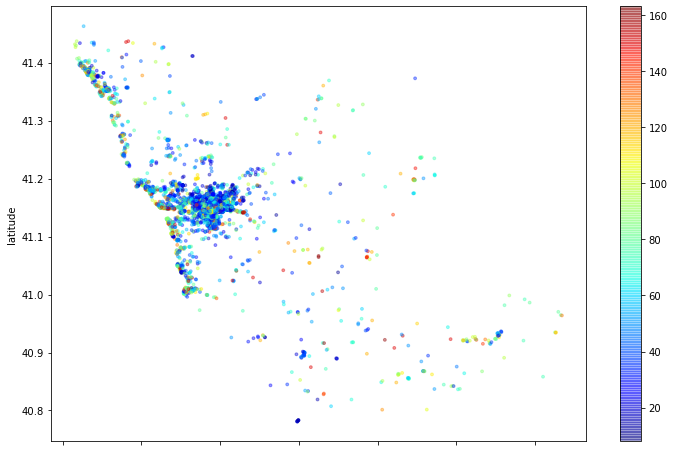

In [29]:
# plotar os imóveis pela localização
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
       cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Foi feito apensa uma analise superficial na base de dados do Airbnb, porem já se percebeu outliers, valores ausentes em algumas variáveis.

No Porto é dividido em vários distritos, e se percebe que os imóveis mais caros ficam na mesma localidade que o distrito e o bairro.

Por fim, lembrar que esse dataset é uma versão resumida, ideial para apenas uma abordagem inicial. Recomendace que sejá usado em uma nova analise exploratória, o conjunto de dados completo.